In [27]:
import numpy as np
import pandas as pd
coins = pd.read_csv('DMCoins.csv')

In [28]:
coinsDollar = coins[coins['Denom'] == 'Dollar']
coinsDollar = coinsDollar[['Year', 'Mint_State', 'Value']]

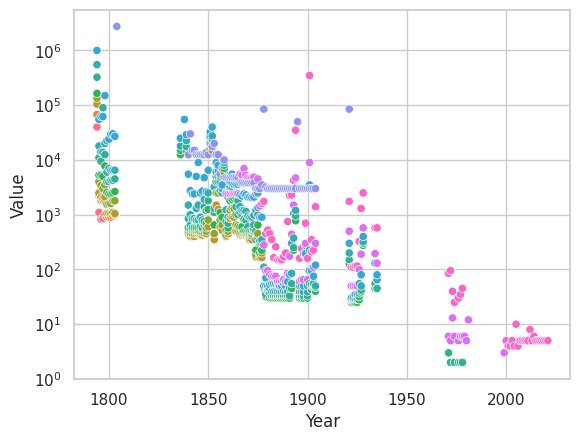

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsDollar, hue='Mint_State', legend=False)
plt.yscale('log')

In [30]:
import pandas as pd

df = pd.DataFrame(coinsDollar)

# Calculate IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers])

Rows with outliers based on IQR:
      Year   Mint_State     Value
7250  1794        AGood   40000.0
7251  1794         Good   67500.0
7252  1794        VGood  105000.0
7253  1794         Fine  135000.0
7254  1794        VFine  165000.0
...    ...          ...       ...
7736  1894  MintState65   35000.0
7738  1895        Proof   50000.0
7778  1901  MintState63    9000.0
7779  1901  MintState65  350000.0
7808  1921        Proof   85000.0

[76 rows x 3 columns]


In [31]:
indicies = df[outliers].index
indicies = np.array(indicies)
indicies

array([7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7263, 7264, 7265,
       7271, 7272, 7273, 7279, 7280, 7281, 7286, 7287, 7288, 7289, 7296,
       7303, 7310, 7317, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331,
       7332, 7333, 7334, 7341, 7348, 7355, 7362, 7369, 7375, 7376, 7383,
       7390, 7397, 7404, 7411, 7412, 7413, 7414, 7415, 7416, 7417, 7418,
       7419, 7420, 7421, 7422, 7423, 7424, 7425, 7432, 7438, 7439, 7445,
       7446, 7464, 7465, 7466, 7625, 7736, 7738, 7778, 7779, 7808])

In [32]:
for i in indicies:
  coinsDollar = coinsDollar.drop(i)

In [33]:
coinsDollar

,Year,Mint_State,Value
7258,1795,AGood,1100.0
7259,1795,Good,2250.0
7260,1795,VGood,2500.0
7261,1795,Fine,4000.0
7262,1795,VFine,5250.0
...,...,...,...
7904,2017,MintState65,5.0
7905,2018,MintState65,5.0
7906,2019,MintState65,5.0
7907,2020,MintState65,5.0


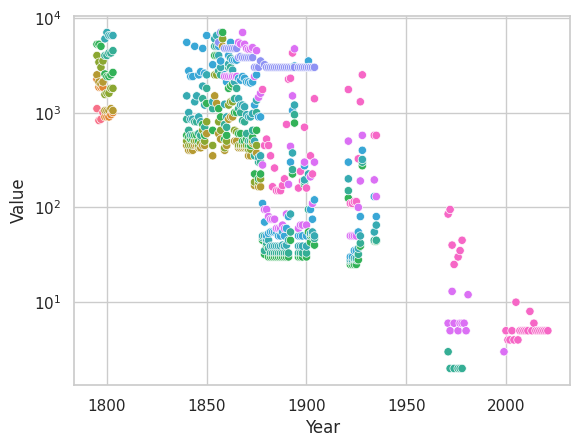

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Year', y = 'Value', data=coinsDollar, hue='Mint_State', legend=False)
plt.yscale('log')

In [35]:
from sklearn.preprocessing import LabelEncoder
lencMS = LabelEncoder()
coinsDollar["Mint_State"] = lencMS.fit_transform(coinsDollar["Mint_State"])
coinsDollar["Mint_State"]

7258     0
7259     4
7260    10
7261     3
7262     9
        ..
7904     7
7905     7
7906     7
7907     7
7908     7
Name: Mint_State, Length: 583, dtype: int64

In [36]:
coinsDollar['log_Value'] = np.log(coinsDollar['Value'])

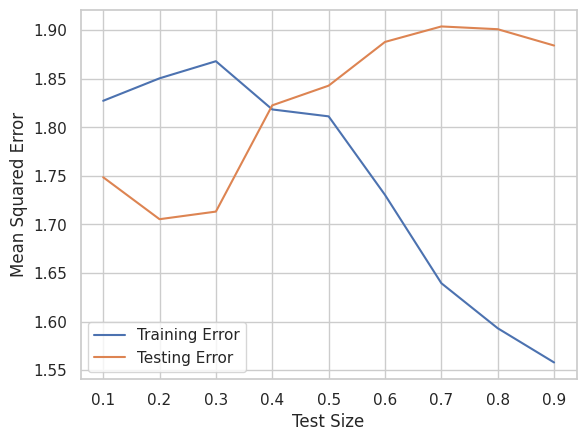

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = coinsDollar.iloc[:,0:2]
y = coinsDollar.log_Value

# Create a linear regression model
model = LinearRegression()

# Choose a range of test sizes
test_sizes = np.linspace(0.1, 0.9, 9)

# Lists to store training and testing errors for each test size
train_errors = []
test_errors = []

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the errors
plt.plot(test_sizes, train_errors, label='Training Error')
plt.plot(test_sizes, test_errors, label='Testing Error')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = coinsDollar.iloc[:,0:2]
Y = coinsDollar.log_Value

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.4, random_state=0)

In [39]:
X

,Year,Mint_State
7258,1795,0
7259,1795,4
7260,1795,10
7261,1795,3
7262,1795,9
...,...,...
7904,2017,7
7905,2018,7
7906,2019,7
7907,2020,7


In [40]:
# Use the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Define a linear regression model
reg = LinearRegression()

# Train and fit the training data
reg.fit(x_train , y_train)

# We will measure how well our linear regression works in our x_test split
# predictions are the estimations
log_predictions = reg.predict(x_test)
predictions = np.exp(log_predictions)

In [41]:
from sklearn.metrics import mean_squared_error

# To compare models
mseModel1 = mean_squared_error(y_test, predictions)

In [42]:
mseModel1

2944017.27545887

In [43]:
coefficients = reg.coef_
intercept = reg.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-0.03345079  0.05999625]
Intercept: 68.4497373695183


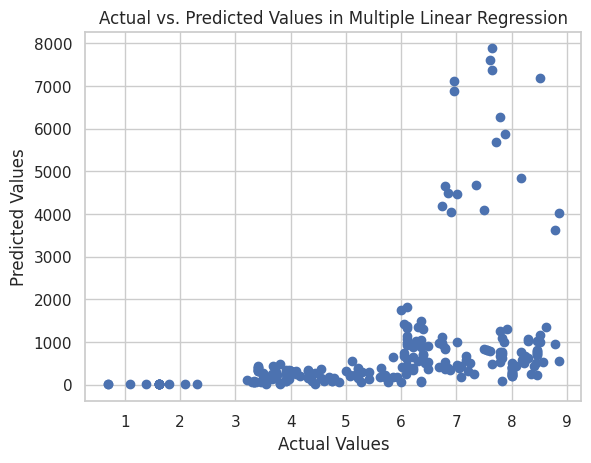

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Multiple Linear Regression')
plt.show()

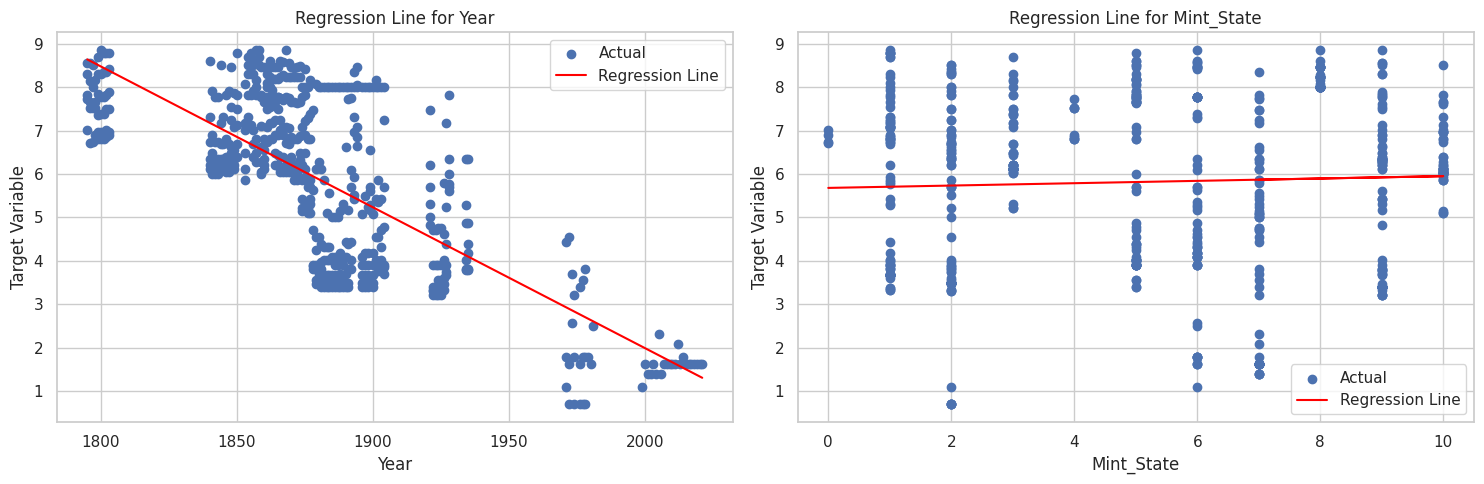

In [45]:
# Create subplots for each independent variable
fig, axs = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

# Iterate through each independent variable
for i, col in enumerate(X.columns):
    # Extract the independent variable
    x_values = X[col].values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_values, Y)

    # Predict the target variable based on the independent variable
    y_pred = model.predict(x_values)

    # Plot the regression line
    axs[i].scatter(x_values, Y, label='Actual')
    axs[i].plot(x_values, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'Regression Line for {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [46]:
coinsDollar[coinsDollar['Mint_State'] == 7]

,Year,Mint_State,Value,log_Value
7624,1878,7,1750.0,7.467371
7631,1879,7,450.0,6.109248
7638,1880,7,525.0,6.263398
7645,1881,7,450.0,6.109248
7652,1882,7,350.0,5.857933
...,...,...,...,...
7904,2017,7,5.0,1.609438
7905,2018,7,5.0,1.609438
7906,2019,7,5.0,1.609438
7907,2020,7,5.0,1.609438


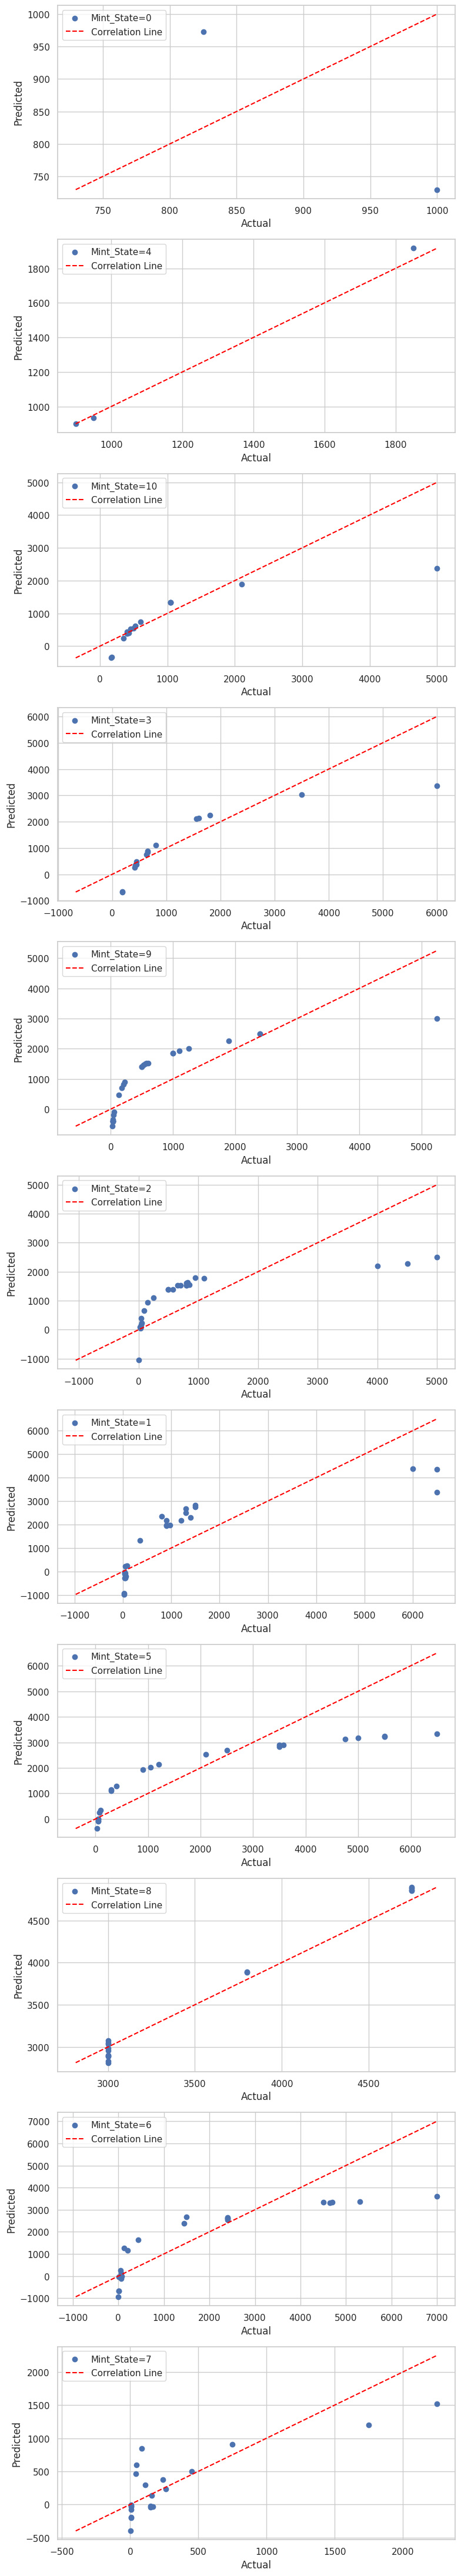

In [47]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
attributes = coinsDollar.drop(['Value'], axis=1)  # All columns except the target variable
target_variable = coinsDollar['Value']  # Specify the column name of your target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute

# Get unique values of the categorical attribute
unique_values = coinsDollar[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows))

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsDollar[coinsDollar[categorical_attribute] == value]

    # Extract attributes and target variable for the subset
    subset_attributes = subset_data.drop(['Value'], axis=1)
    subset_target = subset_data['Value']

    if len(subset_data) > 1:
      # Split the subset into training and testing sets
      subset_attributes_train, subset_attributes_test, subset_target_train, subset_target_test = train_test_split(
          subset_attributes, subset_target, test_size=0.33, random_state=42
      )

      # Create a linear regression model
      model = LinearRegression()

      # Train the model on the training data subset
      model.fit(subset_attributes_train, subset_target_train)

      # Make predictions on the test data subset
      predictions = model.predict(subset_attributes_test)

      # Plot actual vs. predicted for the current category
      axes[i].scatter(subset_target_test, predictions, label=f'{categorical_attribute}={value}')
      axes[i].set_xlabel('Actual')
      axes[i].set_ylabel('Predicted')
      axes[i].legend()

      # Plot the correlation line
      min_val = min(subset_target_test.min(), predictions.min())
      max_val = max(subset_target_test.max(), predictions.max())
      correlation_line = [min_val, max_val]
      axes[i].plot(correlation_line, correlation_line, linestyle='--', color='red', label='Correlation Line')
      axes[i].legend()
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

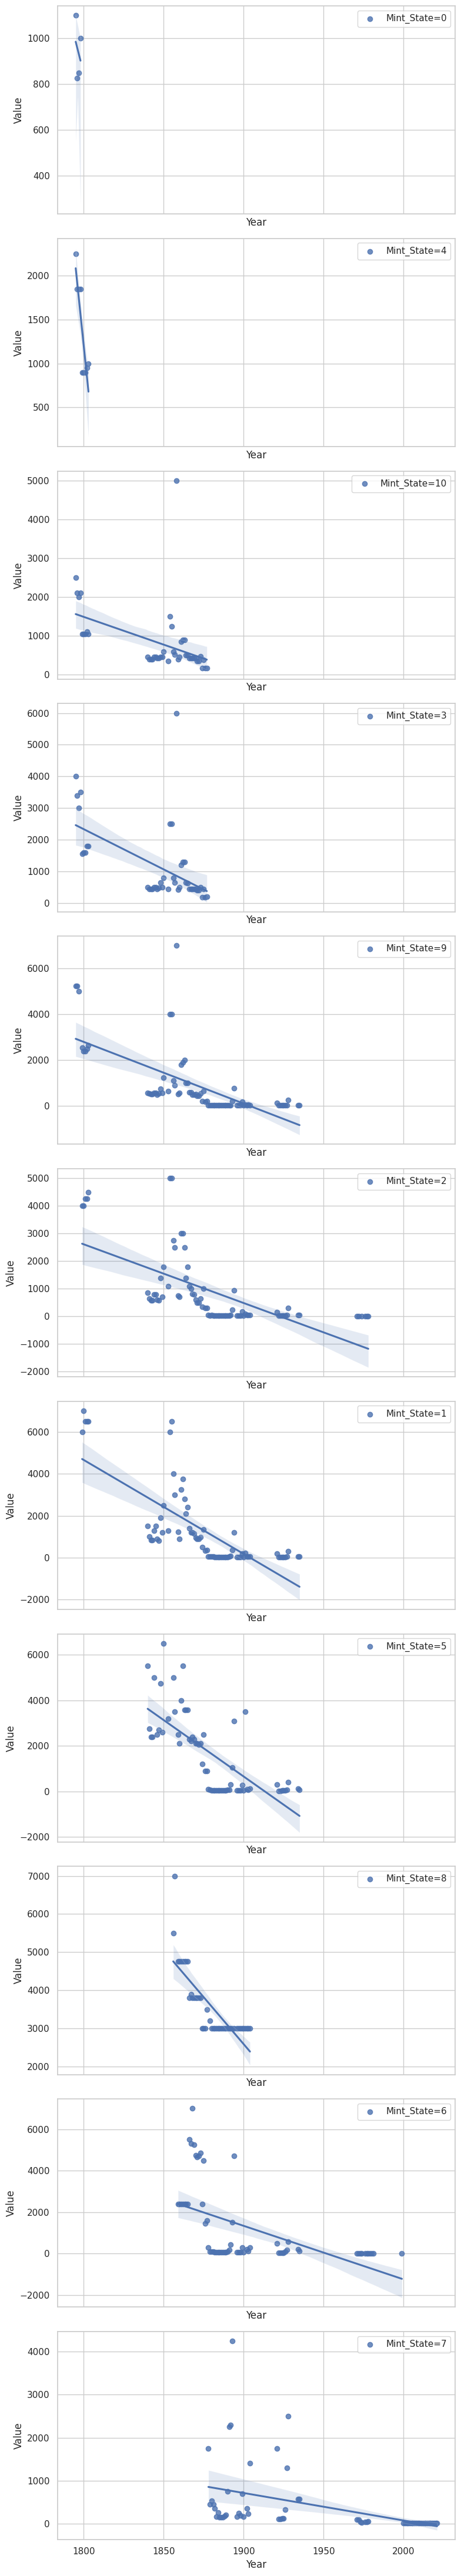

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique values of the categorical attribute
unique_values = coinsDollar[categorical_attribute].unique()

# Set up subplots
num_rows = len(unique_values)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 4 * num_rows), sharex=True)

# Iterate through each unique value of the categorical attribute
for i, value in enumerate(unique_values):
    # Create a subset of the data for the current category
    subset_data = coinsDollar[coinsDollar[categorical_attribute] == value]

    # Plot a scatter plot with a regression line
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], ax=axes[i], label=f'{categorical_attribute}={value}')

    # Set plot labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(target_variable)
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.273720  -0.242713
Mint_State       NaN         NaN       NaN        NaN
Value      -0.273720         NaN  1.000000   0.999485
log_Value  -0.242713         NaN  0.999485   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.871931  -0.856172
Mint_State       NaN         NaN       NaN        NaN
Value      -0.871931         NaN  1.000000   0.997113
log_Value  -0.856172         NaN  0.997113   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.446127  -0.650512
Mint_State       NaN         NaN       NaN        NaN
Value      -0.446127         NaN  1.000000   0.886092
log_Value  -0.650512         NaN  0.886092   1.000000
                Year  Mint_State     Value  log_Value
Year        1.000000         NaN -0.549591  -0.678229
Mint_State       NaN         NaN       NaN        NaN
Value      -0.549591        

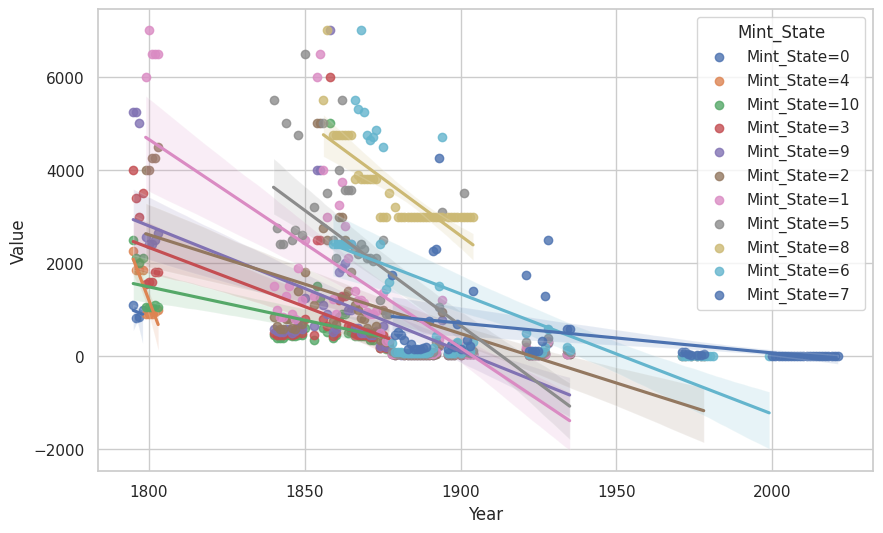

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsDollar[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsDollar[coinsDollar[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data['Year'], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

    print(subset_data.corr())

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

In [50]:
overall_correlation_matrix = coinsDollar.corr()
overall_correlation_matrix

,Year,Mint_State,Value,log_Value
Year,1.000000,0.075295,-0.442426,-0.734859
Mint_State,0.075295,1.000000,0.031546,0.040651
Value,-0.442426,0.031546,1.000000,0.781055
log_Value,-0.734859,0.040651,0.781055,1.000000


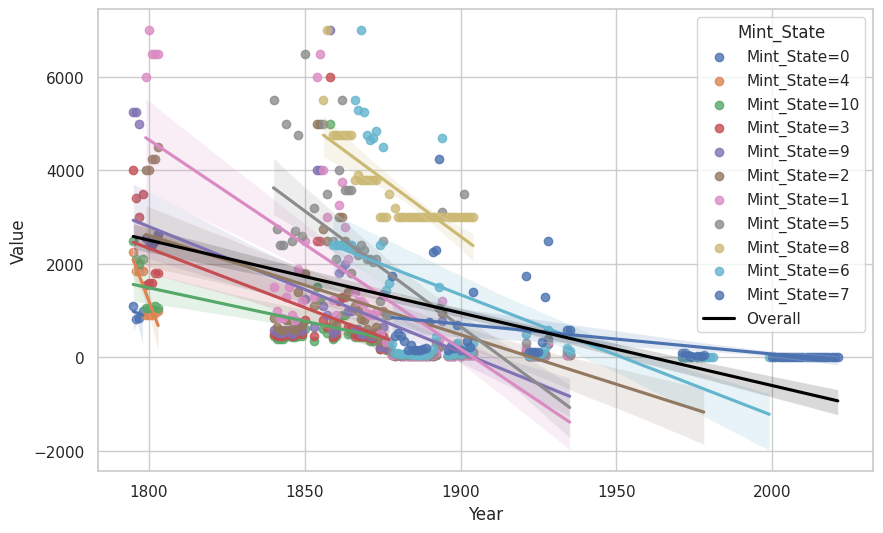

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsDollar[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsDollar[coinsDollar[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsDollar[attribute_column], y=coinsDollar[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()

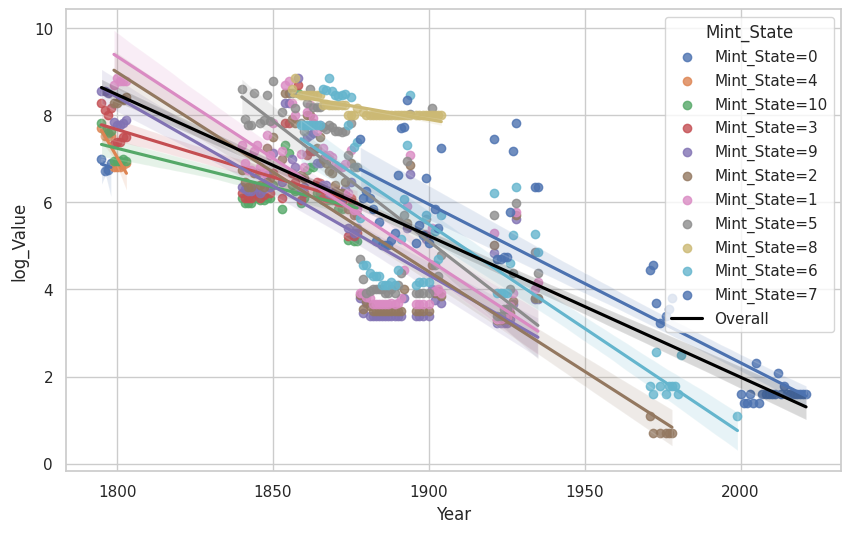

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with attributes, a categorical attribute 'attr', and a target variable
categorical_attribute = 'Mint_State'  # Specify the column name of your categorical attribute
target_variable = 'log_Value'  # Specify the column name of your target variable
attribute_column = 'Year'  # Specify the column name of the attribute of interest

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines for each category
plt.figure(figsize=(10, 6))

# Iterate through each unique value of the categorical attribute
for value in coinsDollar[categorical_attribute].unique():
    # Create a subset of the data for the current category
    subset_data = coinsDollar[coinsDollar[categorical_attribute] == value]

    # Plot a scatter plot with a regression line for each category
    sns.regplot(x=subset_data[attribute_column], y=subset_data[target_variable], label=f'{categorical_attribute}={value}')

# Plot overall regression line
sns.regplot(x=coinsDollar[attribute_column], y=coinsDollar[target_variable], scatter=False, color='black', label='Overall')

# Set plot labels and title
plt.xlabel(attribute_column)
plt.ylabel(target_variable)
plt.legend(title=categorical_attribute)

# Show the plot
plt.show()